# **Different CNN Models**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from skimage.segmentation import slic
import networkx as nx

In [2]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download and load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17347318.56it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 466335.18it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4331533.76it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2490265.20it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# **LeNet5**

In [3]:
# Define LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16 * 4 * 4)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# LeNet-5 model
lenet_model = LeNet5()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lenet_model.parameters(), lr=0.001)

In [4]:
def train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluation on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        running_test_loss = 0.0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                test_loss = criterion(outputs, labels)
                running_test_loss += test_loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_loss = running_test_loss / len(test_loader)
        test_accuracy = correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Train Accuracy: {100 * train_accuracy:.2f}%, "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, test_accuracies

num_epochs = 5
lenet_train_losses, lenet_test_losses, lenet_train_accuracies, lenet_test_accuracies = train_model(lenet_model, criterion, optimizer, train_loader, test_loader, num_epochs)


Epoch 1, Train Loss: 0.2926, Train Accuracy: 91.31%, Test Loss: 0.0815, Test Accuracy: 97.46%
Epoch 2, Train Loss: 0.0795, Train Accuracy: 97.58%, Test Loss: 0.0525, Test Accuracy: 98.22%
Epoch 3, Train Loss: 0.0582, Train Accuracy: 98.17%, Test Loss: 0.0484, Test Accuracy: 98.44%
Epoch 4, Train Loss: 0.0462, Train Accuracy: 98.56%, Test Loss: 0.0411, Test Accuracy: 98.68%
Epoch 5, Train Loss: 0.0386, Train Accuracy: 98.76%, Test Loss: 0.0441, Test Accuracy: 98.42%


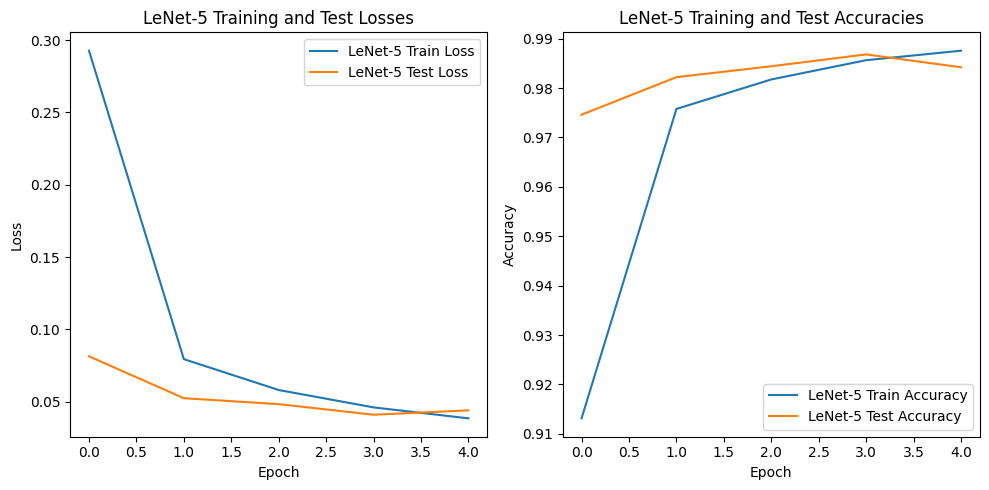

In [5]:
# Plotting losses and accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(lenet_train_losses, label='LeNet-5 Train Loss')
plt.plot(lenet_test_losses, label='LeNet-5 Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('LeNet-5 Training and Test Losses')

plt.subplot(1, 2, 2)
plt.plot(lenet_train_accuracies, label='LeNet-5 Train Accuracy')
plt.plot(lenet_test_accuracies, label='LeNet-5 Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LeNet-5 Training and Test Accuracies')

plt.tight_layout()
plt.show()

# **DenseNet**

In [6]:
# Define DenseNet model
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 7 * 7, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# DenseNet model
densenet_model = DenseNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(densenet_model.parameters(), lr=0.001)


In [7]:
def train_densenet(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluation on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        running_test_loss = 0.0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                test_loss = criterion(outputs, labels)
                running_test_loss += test_loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_loss = running_test_loss / len(test_loader)
        test_accuracy = correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Train Accuracy: {100 * train_accuracy:.2f}%, "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, test_accuracies

num_epochs = 5
densenet_train_losses, densenet_test_losses, densenet_train_accuracies, densenet_test_accuracies = train_densenet(densenet_model, train_loader, test_loader, criterion, optimizer, num_epochs)


Epoch 1, Train Loss: 0.1551, Train Accuracy: 95.15%, Test Loss: 0.0437, Test Accuracy: 98.56%
Epoch 2, Train Loss: 0.0527, Train Accuracy: 98.35%, Test Loss: 0.0273, Test Accuracy: 99.07%
Epoch 3, Train Loss: 0.0399, Train Accuracy: 98.77%, Test Loss: 0.0293, Test Accuracy: 98.97%
Epoch 4, Train Loss: 0.0293, Train Accuracy: 99.06%, Test Loss: 0.0221, Test Accuracy: 99.30%
Epoch 5, Train Loss: 0.0231, Train Accuracy: 99.26%, Test Loss: 0.0213, Test Accuracy: 99.39%


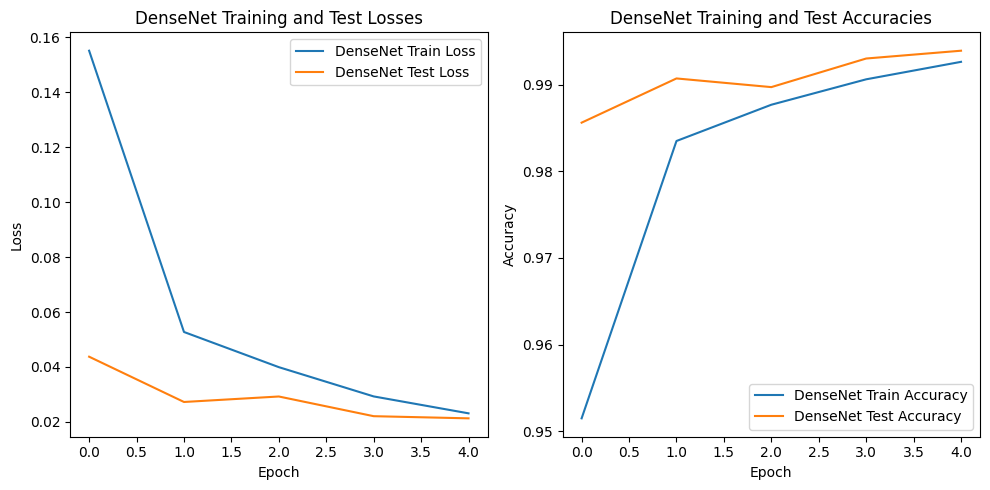

In [8]:
# Plotting losses and accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(densenet_train_losses, label='DenseNet Train Loss')
plt.plot(densenet_test_losses, label='DenseNet Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('DenseNet Training and Test Losses')

plt.subplot(1, 2, 2)
plt.plot(densenet_train_accuracies, label='DenseNet Train Accuracy')
plt.plot(densenet_test_accuracies, label='DenseNet Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('DenseNet Training and Test Accuracies')

plt.tight_layout()
plt.show()

# **ResNet**

In [9]:
# Define ResNet model
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.stride != 1 or residual.size(1) != out.size(1):
            residual = nn.Conv2d(residual.size(1), out.size(1), kernel_size=1, stride=self.stride, bias=False)(residual)
        out += residual
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self.make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self.make_layer(block, 64, num_blocks[2], stride=2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))  # Adjusted pooling layer
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


# ResNet model
resnet_model = ResNet(BasicBlock, [2, 2, 2])

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)


In [10]:
def train_resnet(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluation on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        running_test_loss = 0.0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                test_loss = criterion(outputs, labels)
                running_test_loss += test_loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_loss = running_test_loss / len(test_loader)
        test_accuracy = correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Train Accuracy: {100 * train_accuracy:.2f}%, "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, test_accuracies

num_epochs = 5
resnet_train_losses, resnet_test_losses, resnet_train_accuracies, resnet_test_accuracies = train_resnet(resnet_model, train_loader, test_loader, criterion, optimizer, num_epochs)


Epoch 1, Train Loss: 0.1877, Train Accuracy: 95.17%, Test Loss: 0.1134, Test Accuracy: 96.48%
Epoch 2, Train Loss: 0.0496, Train Accuracy: 98.45%, Test Loss: 0.0674, Test Accuracy: 97.93%
Epoch 3, Train Loss: 0.0392, Train Accuracy: 98.80%, Test Loss: 0.0365, Test Accuracy: 98.90%
Epoch 4, Train Loss: 0.0325, Train Accuracy: 99.02%, Test Loss: 0.0384, Test Accuracy: 98.81%
Epoch 5, Train Loss: 0.0286, Train Accuracy: 99.12%, Test Loss: 0.0320, Test Accuracy: 98.97%


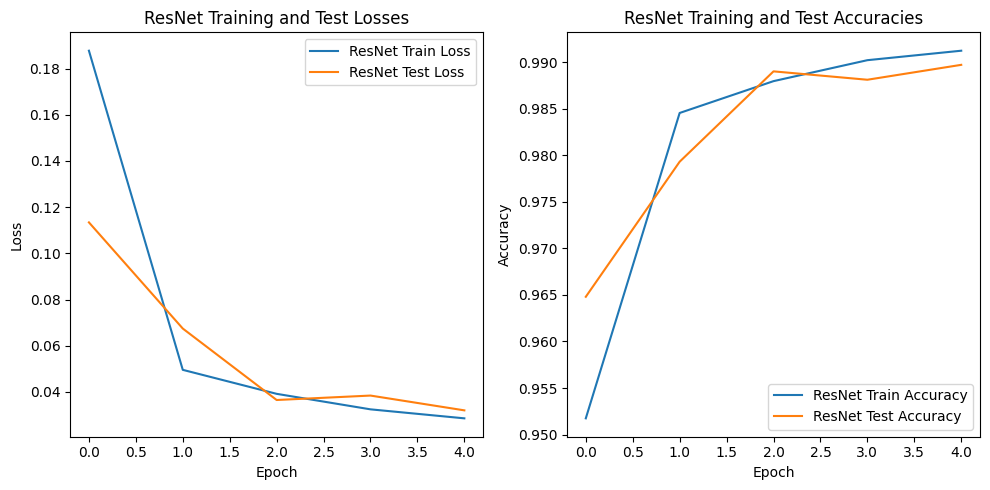

In [11]:
# Plotting losses and accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(resnet_train_losses, label='ResNet Train Loss')
plt.plot(resnet_test_losses, label='ResNet Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet Training and Test Losses')

plt.subplot(1, 2, 2)
plt.plot(resnet_train_accuracies, label='ResNet Train Accuracy')
plt.plot(resnet_test_accuracies, label='ResNet Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet Training and Test Accuracies')

plt.tight_layout()
plt.show()


# **Comparing Different CNN models (LeNet5, DenseNet, ResNet)**

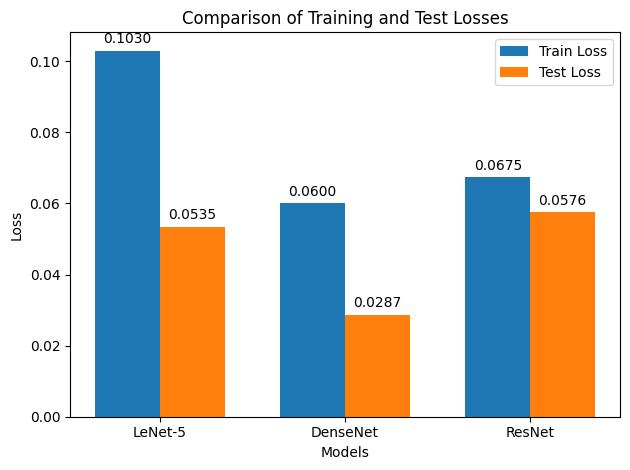

In [12]:
import numpy as np
# Data for plotting
models = ['LeNet-5', 'DenseNet', 'ResNet']
train_losses = [np.mean(lenet_train_losses), np.mean(densenet_train_losses), np.mean(resnet_train_losses)]
test_losses = [np.mean(lenet_test_losses), np.mean(densenet_test_losses), np.mean(resnet_test_losses)]

x = np.arange(len(models))
width = 0.35

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, train_losses, width, label='Train Loss')
bars2 = ax.bar(x + width/2, test_losses, width, label='Test Loss')

ax.set_xlabel('Models')
ax.set_ylabel('Loss')
ax.set_title('Comparison of Training and Test Losses')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


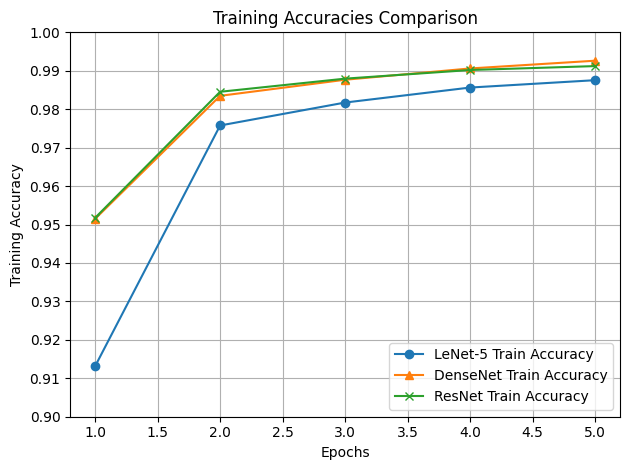

In [13]:
# Data for plotting
epochs = np.arange(1, num_epochs + 1)
plt.plot(epochs, lenet_train_accuracies, label='LeNet-5 Train Accuracy', marker='o')
plt.plot(epochs, densenet_train_accuracies, label='DenseNet Train Accuracy', marker='^')
plt.plot(epochs, resnet_train_accuracies, label='ResNet Train Accuracy', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracies Comparison')
plt.legend()
plt.grid(True)
plt.ylim(0.97, 1.0)  # Set y-axis limits to 97% to 100%
plt.yticks(np.arange(0.90, 1.01, 0.01))  # Set y-axis ticks from 97% to 100% in increments of 1%

plt.tight_layout()
plt.show()


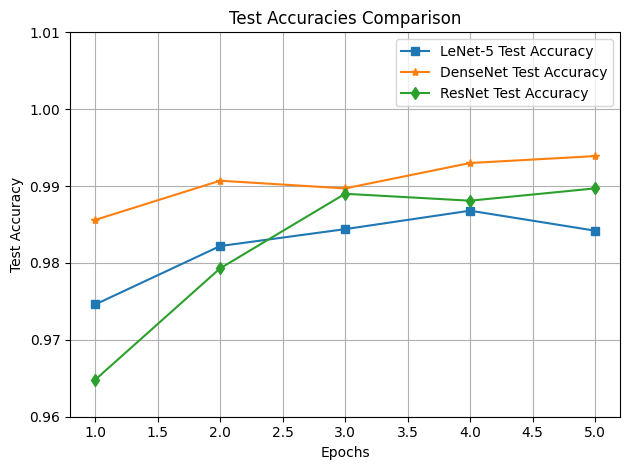

In [14]:
# Data for plotting
epochs = np.arange(1, num_epochs + 1)
plt.plot(epochs, lenet_test_accuracies, label='LeNet-5 Test Accuracy', marker='s')
plt.plot(epochs, densenet_test_accuracies, label='DenseNet Test Accuracy', marker='*')
plt.plot(epochs, resnet_test_accuracies, label='ResNet Test Accuracy', marker='d')

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies Comparison')
plt.legend()
plt.grid(True)
plt.ylim(0.97, 1.0)  # Set y-axis limits to 97% to 100%
plt.yticks(np.arange(0.96, 1.01, 0.01))  # Set y-axis ticks from 97% to 100% in increments of 1%

plt.tight_layout()
plt.show()
